<a href="https://colab.research.google.com/github/ykitaguchi77/Colab_Scripts/blob/master/mediapipe_facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

import cv2

#サポートパッチのインポート
from google.colab.patches import cv2_imshow

     |████████████████████████████████| 32.2MB 93kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


w
face_landmarks: landmark {
  x: 0.5183970332145691
  y: 0.784096360206604
  z: -0.025363430380821228
}
landmark {
  x: 0.5155684947967529
  y: 0.6955821514129639
  z: -0.0736050233244896
}
landmark {
  x: 0.5160558223724365
  y: 0.7190344333648682
  z: -0.033815015107393265
}
landmark {
  x: 0.5011422038078308
  y: 0.599315881729126
  z: -0.06396239995956421
}
landmark {
  x: 0.5147378444671631
  y: 0.6672578454017639
  z: -0.08074238151311874
}
landmark {
  x: 0.5136956572532654
  y: 0.627859354019165
  z: -0.07874749600887299
}
landmark {
  x: 0.5111569762229919
  y: 0.5306215286254883
  z: -0.05159445106983185
}
landmark {
  x: 0.4143674969673157
  y: 0.5220918655395508
  z: 0.002559028333052993
}
landmark {
  x: 0.5092459917068481
  y: 0.46796685457229614
  z: -0.049663569778203964
}
landmark {
  x: 0.5083885788917542
  y: 0.43184834718704224
  z: -0.057176247239112854
}
landmark {
  x: 0.5049333572387695
  y: 0.2893564701080322
  z: -0.05804622173309326
}
landmark {
  x: 0.51892

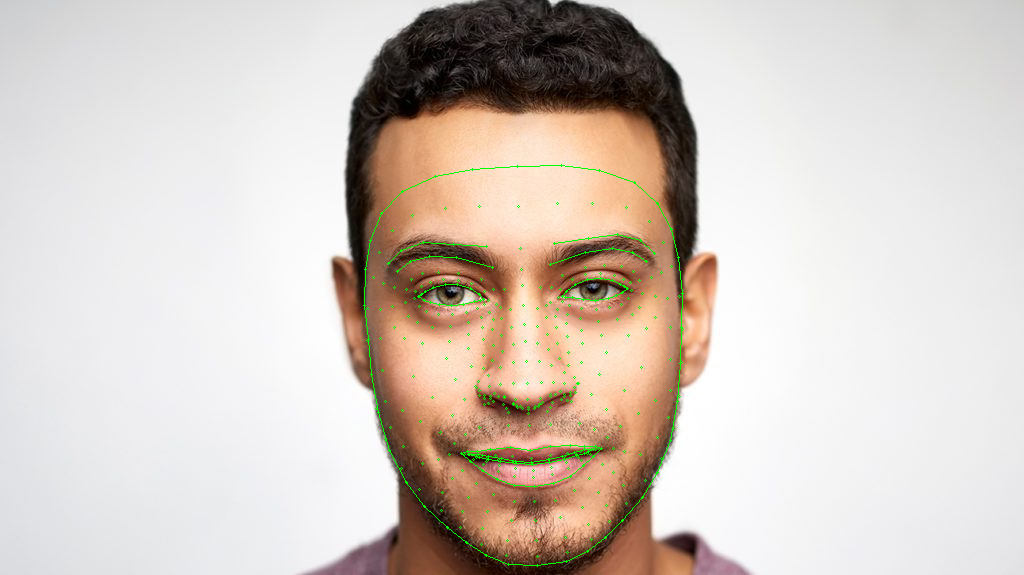

In [10]:
# For static images:
IMAGE_FILES = ['/content/drive/MyDrive/Deep_learning/face.jpg']
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()

    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    
cv2_imshow(annotated_image)
